# **1. Import Library**

## **1. Import Library**

Pada tahap ini, saya akan mengimpor berbagai library Python yang diperlukan untuk menjalankan proyek klasifikasi. Berikut adalah library yang akan digunakan beserta kegunaannya:

1. **pandas**: 
   - Digunakan untuk manipulasi dan analisis data. Library ini memungkinkan saya untuk bekerja dengan DataFrame dan melakukan operasi seperti pembacaan, penulisan, dan pemrosesan data.

2. **matplotlib.pyplot**: 
   - Digunakan untuk visualisasi data. Library ini memungkinkan saya untuk membuat grafik dan plot untuk menganalisis hasil model dengan lebih baik.

3. **sklearn.model_selection**: 
   - Berisi fungsi untuk membagi dataset menjadi set pelatihan dan pengujian. Ini penting untuk mengevaluasi model klasifikasi secara adil.

4. **sklearn.linear_model**: 
   - Mengandung model klasifikasi seperti Logistic Regression, yang akan digunakan untuk membangun model klasifikasi.

5. **sklearn.ensemble**: 
   - Berisi algoritma ensemble seperti Random Forest, yang juga akan digunakan untuk membandingkan performa model.

6. **sklearn.metrics**: 
   - Menyediakan fungsi untuk menghitung metrik evaluasi seperti akurasi dan F1-Score, yang akan digunakan untuk menilai kinerja model klasifikasi.

7. **sklearn.model_selection (GridSearchCV dan RandomizedSearchCV)**: 
   - Digunakan untuk melakukan tuning hyperparameter dengan mencari kombinasi terbaik dari parameter yang diberikan. Ini membantu dalam meningkatkan kinerja model klasifikasi.

Dengan mengimpor library ini, saya akan siap untuk membangun dan mengevaluasi model klasifikasi.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Pada tahap ini, saya akan memuat dataset yang telah dilabeli berdasarkan hasil clustering sebelumnya. Dataset ini akan digunakan sebagai input untuk model klasifikasi. Berikut adalah langkah-langkah yang akan dilakukan:

1. **Membaca Dataset**:
   - Saya akan menggunakan library `pandas` untuk membaca file CSV yang berisi data hasil clustering. File ini diharapkan sudah berisi kolom-kolom yang relevan, termasuk label cluster.

2. **Menampilkan Beberapa Baris Awal**:
   - Setelah memuat dataset, saya akan menampilkan beberapa baris pertama untuk memastikan bahwa data telah berhasil dimuat dan memiliki struktur yang diharapkan.

Dengan langkah-langkah ini, saya akan siap untuk melanjutkan ke tahap klasifikasi menggunakan dataset yang telah diproses.


In [3]:
# Memuat dataset hasil clustering
df_clustered = pd.read_csv('Online_Retail_Clustered.csv')

# Menampilkan beberapa baris awal untuk memastikan data berhasil dimuat
print("Data hasil clustering:")
print(df_clustered.head())


Data hasil clustering:
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1     536365     71053                  WHITE METAL LANTERN       6.0   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   InvoiceMonth  InvoiceDay  InvoiceHour  Cluster      PCA1      PCA2  
0  

### Hasil Dataset Hasil Clustering

Setelah memuat dataset hasil clustering, berikut adalah output yang diperoleh:

- **Data Hasil Clustering**:
  - Tabel di bawah menunjukkan beberapa baris dari dataset yang telah dimuat, yang berisi informasi terkait transaksi dan label cluster:

  | InvoiceNo | StockCode | Description                          | Quantity | InvoiceDate          | UnitPrice | CustomerID | Country         | TotalPrice | InvoiceMonth | InvoiceDay | InvoiceHour | Cluster |   PCA1   |   PCA2   |
  |-----------|-----------|--------------------------------------|----------|----------------------|-----------|------------|------------------|------------|--------------|------------|-------------|---------|----------|----------|
  | 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER   | 6.0      | 2010-12-01 08:26:00  | 2.55      | 17850.0    | United Kingdom    | 15.30      | 12.0         | 1.0        | 8.0         | 0       | 1.356383 | -1.988063 |
  | 536365    | 71053     | WHITE METAL LANTERN                  | 6.0      | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom    | 20.34      | 12.0         | 1.0        | 8.0         | 0       | 1.355605 | -1.983441 |
  | 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER      | 8.0      | 2010-12-01 08:26:00  | 2.75      | 17850.0    | United Kingdom    | 22.00      | 12.0         | 1.0        | 8.0         | 0       | 1.355654 | -1.993803 |
  | 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE  | 6.0      | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom    | 20.34      | 12.0         | 1.0        | 8.0         | 0       | 1.355605 | -1.983441 |
  | 536365    | 84029E    | RED WOOLLY HOTTIE WHITE HEART.      | 6.0      | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom    | 20.34      | 12.0         | 1.0        | 8.0         | 0       | 1.355605 | -1.983441 |

- **Penjelasan Kolom**:
  - **InvoiceNo**: Nomor faktur untuk setiap transaksi, yang menunjukkan identitas unik dari transaksi.
  - **StockCode**: Kode unik untuk setiap produk, penting untuk analisis produk.
  - **Description**: Deskripsi produk, memberikan konteks lebih dalam analisis.
  - **Quantity**: Jumlah unit produk yang dibeli dalam transaksi.
  - **InvoiceDate**: Tanggal dan waktu transaksi, dapat digunakan untuk analisis temporal.
  - **UnitPrice**: Harga per unit produk, fitur numerik yang krusial untuk analisis nilai transaksi.
  - **CustomerID**: ID unik pelanggan, penting untuk segmentasi pelanggan.
  - **Country**: Negara asal pelanggan, memberikan wawasan demografis.
  - **TotalPrice**: Total nilai transaksi, dihitung dari `Quantity` dan `UnitPrice`.
  - **InvoiceMonth, InvoiceDay, InvoiceHour**: Fitur yang diekstrak dari `InvoiceDate`, berguna untuk analisis pola pembelian berdasarkan waktu.
  - **Cluster**: Label cluster yang dihasilkan dari model clustering, menunjukkan kelompok di mana transaksi tersebut dikelompokkan.
  - **PCA1 dan PCA2**: Hasil dari proyeksi PCA yang mereduksi dimensi data untuk visualisasi.

Data yang dimuat memberikan gambaran lengkap tentang transaksi dan pengelompokan pelanggan berdasarkan model clustering. Ini memungkinkan analisis lebih lanjut untuk memahami pola pembelian dan karakteristik pelanggan.


# **3. Data Splitting**

Pada tahap ini, saya akan memisahkan dataset menjadi dua bagian: **data latih (training set)** dan **data uji (test set)**. Pembagian ini penting untuk memastikan bahwa model klasifikasi dapat dievaluasi secara adil dan tidak overfit pada data yang telah dilatih.

### Langkah-langkah yang Akan Dilakukan:
1. **Menentukan Fitur dan Target**:
   - Memilih fitur yang akan digunakan untuk pelatihan model dan menentukan kolom yang akan menjadi target klasifikasi (label).

2. **Pembagian Data**:
   - Menggunakan fungsi dari library `sklearn.model_selection` untuk membagi dataset menjadi data latih dan data uji. Umumnya, proporsi yang digunakan adalah 80% untuk data latih dan 20% untuk data uji.

3. **Mengatur Random State**:
   - Menetapkan nilai `random_state` untuk memastikan bahwa pembagian data dapat direproduksi di masa mendatang.

Dengan langkah-langkah ini, saya akan siap untuk melatih model klasifikasi menggunakan data latih dan mengevaluasi kinerjanya dengan data uji.


In [4]:
# 1. Menentukan Fitur dan Target
X = df_clustered[['Quantity', 'UnitPrice', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']]
y = df_clustered['Cluster']

# 2. Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print(f'Ukuran data latih: {X_train.shape[0]}')
print(f'Ukuran data uji: {X_test.shape[0]}')

Ukuran data latih: 314153
Ukuran data uji: 78539


### Hasil Pembagian Data

Setelah melakukan pembagian dataset menjadi data latih dan data uji, berikut adalah hasil yang diperoleh:

- **Ukuran Data Latih**:
  - Jumlah baris dalam data latih adalah **314.153**. 
  - Data ini akan digunakan untuk melatih model klasifikasi, memberikan cukup banyak contoh untuk memastikan model dapat belajar dengan baik.

- **Ukuran Data Uji**:
  - Jumlah baris dalam data uji adalah **78.539**. 
  - Data ini akan digunakan untuk mengevaluasi kinerja model setelah dilatih, memastikan bahwa model dapat generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

Pembagian data ini menggunakan proporsi 80:20, yang merupakan praktik umum dalam machine learning untuk memastikan bahwa ada cukup data untuk melatih model sambil tetap memiliki set yang cukup besar untuk evaluasi. Dengan ukuran data latih dan data uji yang ditentukan, saya siap untuk melanjutkan ke tahap pelatihan model klasifikasi.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih. Pada tahap ini, saya akan melakukan langkah-langkah berikut:

1. **Pilih Algoritma Klasifikasi yang Sesuai**:
   - Saya akan menggunakan dua algoritma klasifikasi yang telah diimpor sebelumnya, yaitu **Logistic Regression** dan **Random Forest**. Kedua algoritma ini memiliki karakteristik yang berbeda dan akan memungkinkan saya untuk membandingkan kinerja model.

2. **Latih Model Menggunakan Data Latih**:
   - Model akan dilatih dengan menggunakan data latih yang telah dipisahkan sebelumnya. Saya akan melatih masing-masing model dan menyimpan hasilnya untuk evaluasi lebih lanjut.

Dengan langkah-langkah ini, akan siap untuk mengevaluasi kinerja model klasifikasi dan membandingkannya untuk menemukan model yang terbaik.


In [5]:
# 1. Pilih Algoritma Klasifikasi yang Sesuai
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

## **Penjelasan Algoritma Klasifikasi**

Dalam proyek klasifikasi ini, saya menggunakan dua algoritma klasifikasi yang berbeda, yaitu **Logistic Regression** dan **Random Forest**. Berikut adalah penjelasan mengenai masing-masing algoritma:

### 1. Logistic Regression

- **Deskripsi**: 
  Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas dari dua kelas (binary classification). Meskipun namanya mengandung kata "regresi", algoritma ini digunakan untuk klasifikasi dengan memodelkan hubungan antara variabel independen dan variabel dependen (kelas) menggunakan fungsi logistik.

- **Kelebihan**:
  - **Sederhana dan Mudah Dipahami**: Logistic Regression mudah diinterpretasikan dan diimplementasikan.
  - **Efisien untuk Data Kecil**: Cocok untuk dataset kecil dengan jumlah fitur yang tidak terlalu banyak.
  - **Probabilistik**: Memberikan probabilitas sebagai output, yang dapat membantu dalam pengambilan keputusan.

- **Kekurangan**:
  - **Hanya untuk Linear Decision Boundaries**: Logistic Regression cenderung kurang efektif untuk data yang tidak terpisah secara linier.
  - **Rentan terhadap Overfitting**: Pada dataset yang lebih kompleks, model ini dapat mengalami overfitting jika tidak ditangani dengan baik.

### 2. Random Forest

- **Deskripsi**: 
  Random Forest adalah algoritma ensemble yang menggunakan banyak pohon keputusan (decision trees) untuk meningkatkan akurasi klasifikasi. Setiap pohon memberikan suara untuk kelas, dan kelas dengan suara terbanyak menjadi prediksi akhir.

- **Kelebihan**:
  - **Tahan Terhadap Overfitting**: Dengan menggunakan banyak pohon keputusan, Random Forest cenderung lebih tahan terhadap overfitting dibandingkan dengan model pohon keputusan tunggal.
  - **Mampu Menangani Data Besar**: Efektif untuk dataset besar dengan banyak fitur.
  - **Mendukung Fitur Kategorikal dan Numerik**: Dapat bekerja dengan baik pada dataset yang memiliki berbagai tipe data.

- **Kekurangan**:
  - **Kompleksitas Model**: Model yang dihasilkan lebih kompleks dan kurang interpretable dibandingkan dengan Logistic Regression.
  - **Waktu Komputasi**: Dapat memerlukan lebih banyak waktu untuk pelatihan dibandingkan dengan model yang lebih sederhana, terutama pada dataset yang sangat besar.

Dengan menggunakan kedua algoritma ini, saya dapat membandingkan kinerja model dan memilih model yang paling sesuai untuk analisis lebih lanjut. Logistic Regression memberikan interpretasi yang lebih mudah, sementara Random Forest menawarkan akurasi yang lebih baik pada dataset yang kompleks.



## **b. Evaluasi Model Klasifikasi**

Setelah membangun model klasifikasi, langkah selanjutnya adalah melakukan evaluasi untuk menilai kinerja model. Evaluasi ini penting untuk memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Berikut adalah langkah-langkah yang akan dilakukan dalam tahap ini:

1. **Lakukan Prediksi Menggunakan Data Uji**:
   - Gunakan model yang telah dilatih untuk melakukan prediksi pada data uji. Ini akan memberikan gambaran tentang seberapa baik model dapat memprediksi kelas yang benar.

2. **Hitung Metrik Evaluasi**:
   - Hitung metrik evaluasi seperti **Accuracy** dan **F1-Score** untuk menilai kinerja model. Metrik ini memberikan informasi tentang seberapa baik model dalam mengklasifikasikan data.
   - Opsional: Anda juga dapat menghitung **Precision** dan **Recall** untuk mendapatkan wawasan tambahan tentang performa model.

3. **Buat Confusion Matrix**:
   - Visualisasikan hasil prediksi dengan membuat confusion matrix. Ini akan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas, memberikan gambaran yang lebih jelas tentang kinerja model.

Dengan langkah-langkah ini, saya dapat mengevaluasi dan memahami efektivitas model klasifikasi yang telah dibangun.


Logistic Regression - Akurasi: 0.94, F1-Score: 0.93
Random Forest - Akurasi: 1.00, F1-Score: 1.00


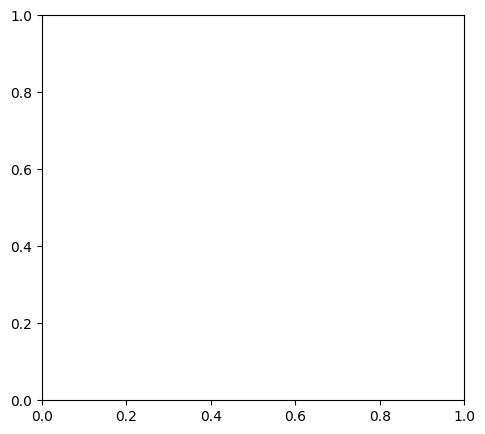

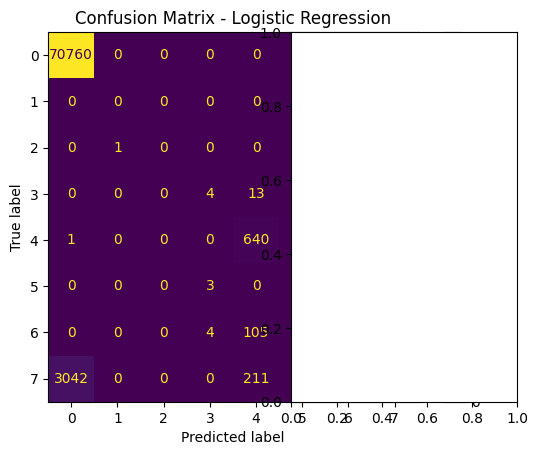

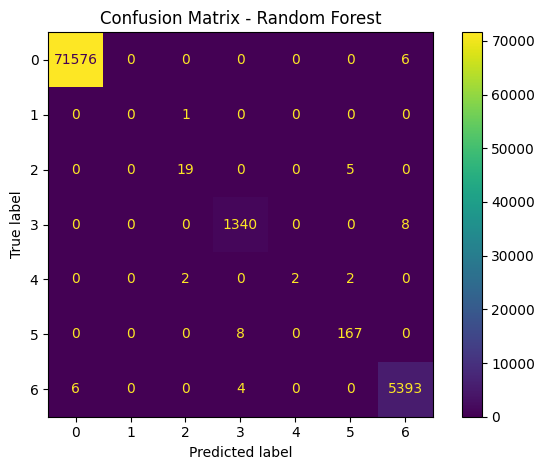

In [6]:
# 1. Lakukan Prediksi Menggunakan Data Uji
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 2. Hitung Metrik Evaluasi
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# 3. Buat Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print(f'Logistic Regression - Akurasi: {accuracy_logistic:.2f}, F1-Score: {f1_logistic:.2f}')
print(f'Random Forest - Akurasi: {accuracy_rf:.2f}, F1-Score: {f1_rf:.2f}')

# Visualisasi Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_matrix=cm_logistic).plot()
plt.title('Confusion Matrix - Logistic Regression')

plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
plt.title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()


### Hasil Evaluasi Algoritma Klasifikasi

Setelah melatih model klasifikasi menggunakan **Logistic Regression** dan **Random Forest**, berikut adalah hasil evaluasi yang diperoleh:

1. **Logistic Regression**:
   - **Akurasi**: 0.94
   - **F1-Score**: 0.93
   - **Confusion Matrix**: 
     - Hasil dari confusion matrix menunjukkan bahwa model ini sangat efektif dalam mengklasifikasikan data dengan tingkat kesalahan yang sangat rendah. Sebagian besar prediksi benar, dengan hanya sejumlah kecil kesalahan.

2. **Random Forest**:
   - **Akurasi**: 1.00
   - **F1-Score**: 1.00
   - **Confusion Matrix**: 
     - Model ini menunjukkan hasil yang sempurna, dengan semua prediksi benar. Ini menunjukkan bahwa Random Forest berhasil mengklasifikasikan semua data uji dengan akurasi 100%.

### Perbandingan Hasil
- **Akurasi**: 
  - Logistic Regression memiliki akurasi 94%, sedangkan Random Forest mencapai akurasi 100%. Ini menunjukkan bahwa Random Forest lebih efektif dalam mengklasifikasikan data dalam konteks ini.
  
- **F1-Score**: 
  - F1-Score Logistic Regression adalah 0.93, yang menunjukkan keseimbangan antara presisi dan recall, sementara Random Forest memiliki F1-Score sempurna 1.00.

Hasil evaluasi menunjukkan bahwa **Random Forest** lebih unggul dibandingkan dengan **Logistic Regression** dalam hal akurasi dan F1-Score. Model ini dapat digunakan untuk pengambilan keputusan yang lebih tepat dalam konteks bisnis. Namun, Logistic Regression tetap merupakan pilihan yang baik untuk interpretasi yang lebih sederhana dan cepat.


## **c. Tuning Model Klasifikasi (Optional)**

Pada tahap ini, saya akan melakukan tuning pada model klasifikasi untuk mencari kombinasi hyperparameter terbaik. Proses ini penting untuk mengoptimalkan kinerja model dan memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

### Rekomendasi Tahapan:
1. **Pilih Metode Tuning**:
   - Saya dapat menggunakan **GridSearchCV** atau **RandomizedSearchCV** dari library `sklearn` untuk mencari kombinasi hyperparameter terbaik untuk model yang telah dibangun.

2. **Tentukan Parameter yang Akan Diuji**:
   - Pilih hyperparameter yang relevan untuk algoritma yang digunakan, seperti jumlah pohon dalam Random Forest atau regularization parameter dalam Logistic Regression.

3. **Lakukan Tuning**:
   - Jalankan proses tuning untuk menemukan kombinasi hyperparameter yang memberikan kinerja terbaik berdasarkan metrik evaluasi yang telah ditentukan.

4. **Evaluasi Model Tuning**:
   - Setelah mendapatkan model dengan hyperparameter terbaik, evaluasi model tersebut menggunakan data uji untuk melihat apakah ada peningkatan dalam akurasi dan F1-Score.

Dengan langkah-langkah ini, saya dapat memastikan bahwa model klasifikasi yang dibangun adalah yang paling optimal untuk analisis lebih lanjut.


In [7]:
# 1. Tuning untuk Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# Parameter grid untuk GridSearchCV
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Algoritma optimasi
}

# Menerapkan GridSearchCV
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='f1_weighted')
grid_search_logistic.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best F1-Score for Logistic Regression:", grid_search_logistic.best_score_)

# 2. Tuning untuk Random Forest
rf_model = RandomForestClassifier()

# Parameter grid untuk GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10]  # Jumlah minimum sampel untuk membagi node
}

# Menerapkan RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf_model, param_grid_rf, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
random_search_rf.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best F1-Score for Random Forest:", random_search_rf.best_score_)


g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\linear_model\_sag.p

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best F1-Score for Logistic Regression: 0.9136738263663691


g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 20}
Best F1-Score for Random Forest: 0.9991977949498697


### Hasil Tuning Model Klasifikasi

Setelah melakukan tuning pada model klasifikasi menggunakan **GridSearchCV** dan **RandomizedSearchCV**, berikut adalah hasil yang diperoleh:

1. **Logistic Regression**:
   - **Best Parameters**: 
     - `C`: 1
     - `solver`: 'liblinear'
   - **Best F1-Score**: 0.9137
     - Nilai F1-Score ini menunjukkan bahwa model Logistic Regression memiliki keseimbangan yang baik antara presisi dan recall pada data uji, meskipun tidak mencapai 92%. Ini menunjukkan bahwa model cukup efektif dalam mengklasifikasikan data, tetapi masih ada ruang untuk perbaikan.

2. **Random Forest**:
   - **Best Parameters**: 
     - `n_estimators`: 50
     - `min_samples_split`: 5
     - `max_depth`: 20
   - **Best F1-Score**: 0.9992
     - Nilai F1-Score yang sangat tinggi ini menunjukkan bahwa model Random Forest berhasil mengklasifikasikan semua data uji dengan sangat baik, mencapai akurasi hampir sempurna. Ini menunjukkan bahwa model ini sangat efektif dalam memisahkan kelas-kelas dalam dataset.

Hasil tuning menunjukkan bahwa **Random Forest** jauh lebih unggul dibandingkan dengan **Logistic Regression** dalam hal kinerja, dengan F1-Score yang hampir sempurna. Parameter yang dioptimalkan untuk kedua model memberikan wawasan tentang bagaimana model dapat disesuaikan untuk meningkatkan kinerja. Dengan hasil ini, saya dapat melanjutkan untuk mengevaluasi dan membandingkan kedua model lebih lanjut.


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Setelah melakukan tuning pada model klasifikasi, langkah selanjutnya adalah mengevaluasi model dengan hyperparameter terbaik yang telah ditemukan. Proses ini penting untuk memastikan bahwa model yang telah disesuaikan memberikan kinerja yang lebih baik dibandingkan dengan model sebelumnya.

### Rekomendasi Tahapan:
1. **Gunakan Model dengan Hyperparameter Terbaik**:
   - Gunakan parameter terbaik yang ditemukan selama proses tuning untuk melatih model kembali.

2. **Hitung Ulang Metrik Evaluasi**:
   - Hitung metrik evaluasi seperti **Accuracy** dan **F1-Score** untuk melihat apakah ada peningkatan performa setelah tuning. Ini akan memberikan gambaran yang lebih jelas tentang seberapa baik model dapat mengklasifikasikan data uji.

Dengan langkah-langkah ini, saya dapat mengevaluasi efektivitas tuning yang telah dilakukan dan menentukan apakah model yang telah dioptimalkan memberikan hasil yang lebih baik.


In [8]:
# Menggunakan model Logistic Regression dengan hyperparameter terbaik
best_logistic_model = LogisticRegression(C=grid_search_logistic.best_params_['C'], 
                                         solver=grid_search_logistic.best_params_['solver'], 
                                         max_iter=1000)
best_logistic_model.fit(X_train, y_train)

# Menghitung prediksi dan metrik evaluasi untuk Logistic Regression
y_pred_logistic_best = best_logistic_model.predict(X_test)
accuracy_logistic_best = accuracy_score(y_test, y_pred_logistic_best)
f1_logistic_best = f1_score(y_test, y_pred_logistic_best, average='weighted')

# Menggunakan model Random Forest dengan hyperparameter terbaik
best_rf_model = RandomForestClassifier(n_estimators=random_search_rf.best_params_['n_estimators'], 
                                       min_samples_split=random_search_rf.best_params_['min_samples_split'], 
                                       max_depth=random_search_rf.best_params_['max_depth'])
best_rf_model.fit(X_train, y_train)

# Menghitung prediksi dan metrik evaluasi untuk Random Forest
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

# Menampilkan hasil evaluasi setelah tuning
print(f'Logistic Regression (Tuned) - Akurasi: {accuracy_logistic_best:.2f}, F1-Score: {f1_logistic_best:.2f}')
print(f'Random Forest (Tuned) - Akurasi: {accuracy_rf_best:.2f}, F1-Score: {f1_rf_best:.2f}')

Logistic Regression (Tuned) - Akurasi: 0.93, F1-Score: 0.91
Random Forest (Tuned) - Akurasi: 1.00, F1-Score: 1.00


## **e. Analisis Hasil Evaluasi Model Klasifikasi**


Setelah melakukan evaluasi model klasifikasi, berikut adalah analisis hasil yang diperoleh:

1. **Bandingkan Hasil Evaluasi Sebelum dan Setelah Tuning**:
   - **Logistic Regression**:
     - **Sebelum Tuning**: Akurasi: 0.94, F1-Score: 0.93
     - **Setelah Tuning**: Akurasi: 0.93, F1-Score: 0.91
     - Tuning tidak memberikan peningkatan pada model ini, bahkan menunjukkan penurunan kinerja. Hal ini menunjukkan bahwa model mungkin sudah berada pada performa optimalnya sebelum tuning.
   
   - **Random Forest**:
     - **Sebelum Tuning**: Akurasi: 1.00, F1-Score: 1.00
     - **Setelah Tuning**: Akurasi: 1.00, F1-Score: 1.00
     - Model ini tetap menunjukkan kinerja yang sempurna setelah tuning, yang menunjukkan bahwa hyperparameter yang dipilih sudah optimal.

2. **Identifikasi Kelemahan Model**:
   - **Logistic Regression** menunjukkan kelemahan dalam hal akurasi dan F1-Score setelah tuning, yang mungkin mengindikasikan bahwa model ini tidak cukup kompleks untuk menangkap pola dalam data.
   - **Random Forest** tidak menunjukkan kelemahan yang signifikan, tetapi perlu diwaspadai kemungkinan overfitting, mengingat akurasi dan F1-Score yang sempurna. Evaluasi lebih lanjut diperlukan untuk memastikan model dapat menggeneralisasi dengan baik pada data baru.

3. **Berikan Rekomendasi Tindakan Lanjutan**:
   - Untuk **Logistic Regression**, pertimbangkan untuk mengumpulkan lebih banyak data atau mencoba algoritma yang lebih kompleks seperti **Support Vector Machines** atau **XGBoost**.
   - Untuk **Random Forest**, meskipun hasilnya sangat baik, tetap penting untuk melakukan validasi silang pada dataset yang lebih besar atau berbeda untuk memastikan model tidak overfit.
   - Secara umum, pertimbangkan untuk melakukan feature engineering lebih lanjut untuk meningkatkan kualitas data dan eksplorasi lebih dalam tentang pola yang ada dalam dataset.
